<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Example_code_different_models_(binary_outcome).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example code for models with a binary outcome

This notebook simply contains the code for different models trying to predict a binary outcome. There is no context to these examples: sometimes it just comes in handy to have these different approaches together in one place, to pick and choose from when running your own models.

In [2]:
install.packages('mlbench')
install.packages('caret')
install.packages('randomForest')
install.packages('xgboost')
install.packages('e1071')
install.packages('glmnet')

library(mlbench)
library(caret)
library(randomForest)
library(xgboost)
library(e1071)
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




We use the dataset Sonar, a dataset containing information on sonar signals that can be used to classify objects as either Rocks (R) or Mines (M).

In [4]:
data(Sonar)
df <- Sonar
head(df)
table(df$Class)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R



  M   R 
111  97 

We split the data in a train and test set and define a cross-validation strategy that will be used for all the different models.

In [9]:
set.seed(1)
train <- createDataPartition(df$Class,p = 0.7, list = FALSE)
df_train <- df[train,]
df_test <- df[-train,]

In [5]:
control <- trainControl(method="repeatedcv", 
                        number = 10, 
                        repeats = 3)

###Model 1: Logistic Regression

In [10]:
set.seed(825)
LmFit <- train(Class ~ ., 
                  data = df_train, 
                  method = "glm", 
                  family = "binomial",
                  trControl = control)
LmFit
summary(LmFit)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

Generalized Linear Model 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 132, 131, 131, 131, 132, 131, ... 
Resampling results:

  Accuracy   Kappa    
  0.7568254  0.5098929



Call:
NULL

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.827e-05  -2.110e-08  -2.110e-08   2.110e-08   1.486e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.181e+01  4.520e+05       0        1
V1           1.293e+01  3.625e+06       0        1
V2          -7.960e+02  5.116e+06       0        1
V3           7.722e+02  4.150e+06       0        1
V4          -2.981e+02  3.310e+06       0        1
V5          -9.646e+01  3.017e+06       0        1
V6          -1.230e+01  3.444e+06       0        1
V7           3.208e+02  3.560e+06       0        1
V8           3.137e+01  1.969e+06       0        1
V9          -1.041e+02  1.577e+06       0        1
V10         -6.316e+01  2.080e+06       0        1
V11          1.403e+02  3.011e+06       0        1
V12         -3.560e+02  2.265e+06       0        1
V13          2.018e+02  1.500e+06       0        1
V14         -6.913e+01  1.133e+06       0        1
V15         -

Performance on the test set is evaluated using the confusion matrix

In [11]:
confusionMatrix(predict(LmFit, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 25 12
         R  8 17
                                          
               Accuracy : 0.6774          
                 95% CI : (0.5466, 0.7906)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 0.01444         
                                          
                  Kappa : 0.3467          
                                          
 Mcnemar's Test P-Value : 0.50233         
                                          
            Sensitivity : 0.7576          
            Specificity : 0.5862          
         Pos Pred Value : 0.6757          
         Neg Pred Value : 0.6800          
             Prevalence : 0.5323          
         Detection Rate : 0.4032          
   Detection Prevalence : 0.5968          
      Balanced Accuracy : 0.6719          
                                          
       'Positive' Class : M               
                                    

###Model 2: LASSO

In [14]:
lambda <- 10^seq(-3,3,length=100)
set.seed(825)
LassoFit <- train(Class ~ ., 
                  data = df_train, 
                  method = "glmnet", 
                  family = "binomial",
                  trControl = control,
                  tuneGrid = expand.grid(alpha = 1, lambda = lambda))
LassoFit
coef(LassoFit$finalModel, LassoFit$bestTune$lambda)

glmnet 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 132, 131, 131, 131, 132, 131, ... 
Resampling results across tuning parameters:

  lambda        Accuracy   Kappa     
  1.000000e-03  0.7903175  0.57383680
  1.149757e-03  0.7857143  0.56485838
  1.321941e-03  0.7788889  0.55054687
  1.519911e-03  0.7766667  0.54620111
  1.747528e-03  0.7744444  0.54258128
  2.009233e-03  0.7812698  0.55603471
  2.310130e-03  0.7858730  0.56509762
  2.656088e-03  0.7880952  0.56960141
  3.053856e-03  0.7785714  0.55056701
  3.511192e-03  0.7812698  0.55676543
  4.037017e-03  0.7790476  0.55218049
  4.641589e-03  0.7833333  0.56060451
  5.336699e-03  0.7857143  0.56552950
  6.135907e-03  0.7812698  0.55611392
  7.054802e-03  0.7836508  0.55968788
  8.111308e-03  0.7812698  0.55492598
  9.326033e-03  0.7833333  0.55897603
  1.072267e-02  0.7807937  0.55476793
  1.232847e-02  0.7765079  0.54680183


61 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)    6.0001062
V1           -94.1556678
V2           -39.2724215
V3            37.1662531
V4             .        
V5           -27.8293739
V6            19.8914744
V7            12.4531693
V8            24.0263489
V9           -17.8521685
V10           -1.8804901
V11            .        
V12          -21.6638819
V13            .        
V14            .        
V15            .        
V16            2.7275953
V17           16.4026025
V18            .        
V19           -5.8507422
V20           -2.2300819
V21            0.1713346
V22           -6.0830642
V23           -7.6077833
V24            .        
V25            2.8858980
V26            1.9457006
V27            .        
V28           -3.2681359
V29            .        
V30            .        
V31           23.8731152
V32          -13.3782532
V33            .        
V34            1.0182817
V35            .        
V36           10.7428264
V37     

In [15]:
confusionMatrix(predict(LassoFit, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 23 10
         R 10 19
                                          
               Accuracy : 0.6774          
                 95% CI : (0.5466, 0.7906)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 0.01444         
                                          
                  Kappa : 0.3521          
                                          
 Mcnemar's Test P-Value : 1.00000         
                                          
            Sensitivity : 0.6970          
            Specificity : 0.6552          
         Pos Pred Value : 0.6970          
         Neg Pred Value : 0.6552          
             Prevalence : 0.5323          
         Detection Rate : 0.3710          
   Detection Prevalence : 0.5323          
      Balanced Accuracy : 0.6761          
                                          
       'Positive' Class : M               
                                    

###Model 3: Random Forest

Random Forest 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 131, 131, 132, 131, 132, 131, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8246886  0.6456688
  31    0.8087912  0.6160479
  60    0.7980220  0.5939566

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.86%
Confusion matrix:
   M  R class.error
M 69  9   0.1153846
R 20 48   0.2941176

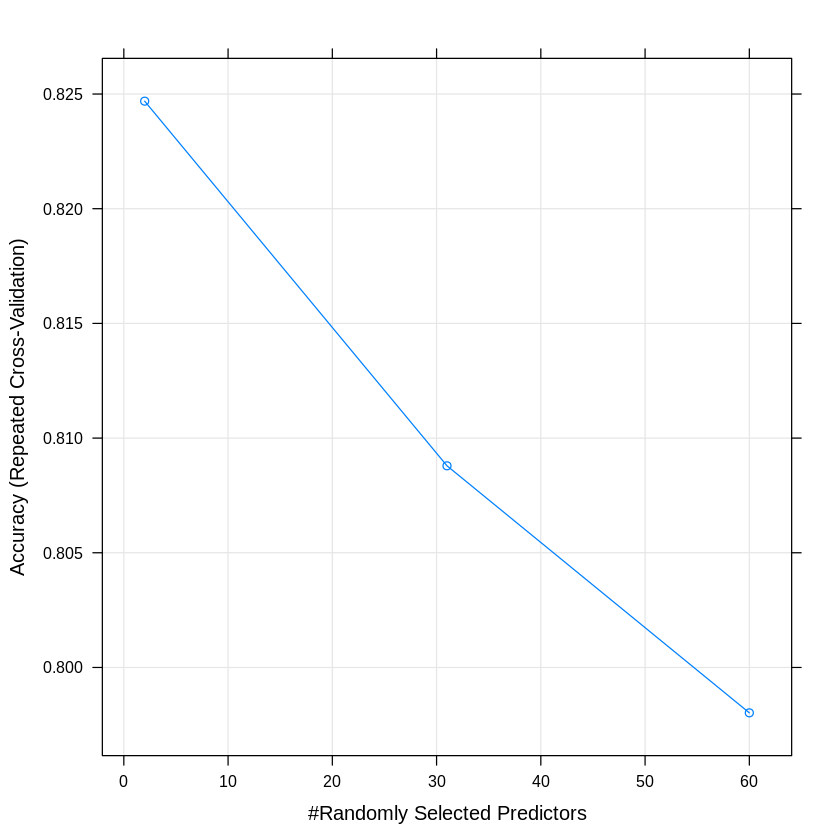

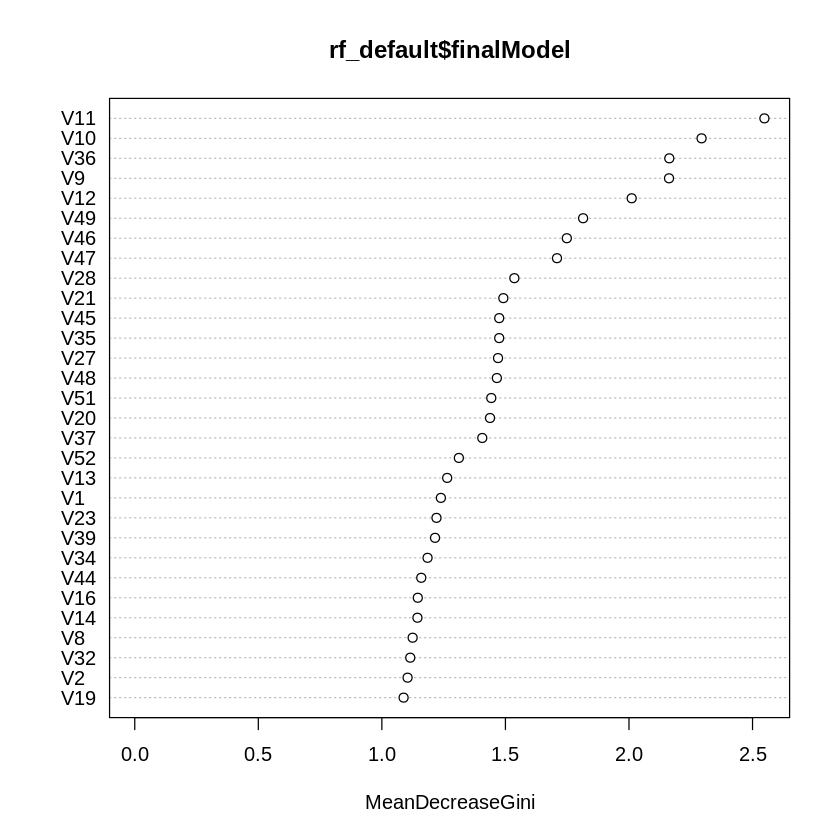

In [16]:
set.seed(123456)
rf_default <- train(Class~., 
                    data = df_train, 
                    method="rf", 
                    trControl = control)
rf_default
rf_default$finalModel
plot(rf_default)
varImpPlot(rf_default$finalModel)

In [17]:
confusionMatrix(predict(rf_default, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 31  6
         R  2 23
                                          
               Accuracy : 0.871           
                 95% CI : (0.7615, 0.9426)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 1.5e-08         
                                          
                  Kappa : 0.7387          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9394          
            Specificity : 0.7931          
         Pos Pred Value : 0.8378          
         Neg Pred Value : 0.9200          
             Prevalence : 0.5323          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5968          
      Balanced Accuracy : 0.8662          
                                          
       'Positive' Class : M               
                                    

By default, random forest only considers three different parameter values for the hyperparameter mtry, but we can let the algorithm try out additional hyperparameter values.

.mtry
<dbl>
2
7
12
17
22
27
32
37
42


Random Forest 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 131, 131, 132, 131, 132, 131, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8221245  0.6396159
   7    0.8129182  0.6223606
  12    0.7930769  0.5819623
  17    0.8134188  0.6242915
  22    0.8060928  0.6095090
  27    0.8040049  0.6059886
  32    0.8064103  0.6102441
  37    0.8132357  0.6238871
  42    0.8067277  0.6110319

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.81%
Confusion matrix:
   M  R class.error
M 69  9   0.1153846
R 17 51   0.2500000

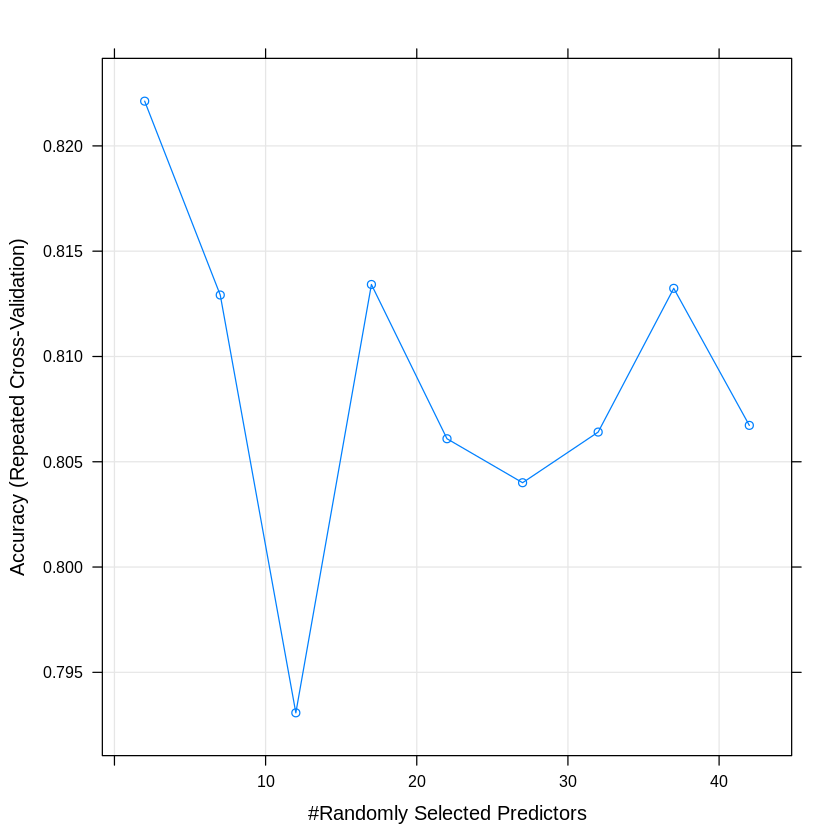

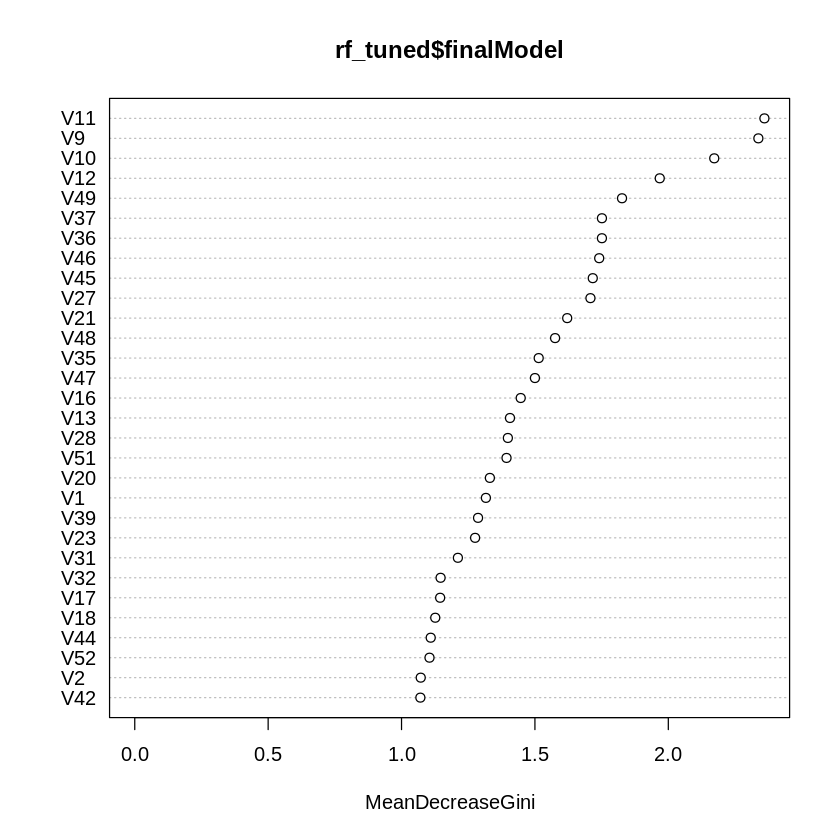

In [19]:
tunegrid <- expand.grid(.mtry=seq(from = 2, to=42, by = 5))
tunegrid

set.seed(123456)
rf_tuned <- train(Class~., 
                  data = df_train, 
                  method="rf", 
                  tuneGrid = tunegrid, 
                  trControl = control)
rf_tuned
rf_tuned$finalModel
plot(rf_tuned)
varImpPlot(rf_tuned$finalModel)

In [20]:
confusionMatrix(predict(rf_tuned, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 29  5
         R  4 24
                                          
               Accuracy : 0.8548          
                 95% CI : (0.7422, 0.9314)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 8.133e-08       
                                          
                  Kappa : 0.7079          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8788          
            Specificity : 0.8276          
         Pos Pred Value : 0.8529          
         Neg Pred Value : 0.8571          
             Prevalence : 0.5323          
         Detection Rate : 0.4677          
   Detection Prevalence : 0.5484          
      Balanced Accuracy : 0.8532          
                                          
       'Positive' Class : M               
                                    

###Model 4: Extreme Gradient Boosting

eXtreme Gradient Boosting 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 131, 131, 132, 131, 132, 131, ... 
Resampling results across tuning parameters:

  eta  max_depth  colsample_bytree  subsample  nrounds  Accuracy   Kappa    
  0.3  1          0.6               0.50        50      0.8113797  0.6197708
  0.3  1          0.6               0.50       100      0.8133944  0.6221930
  0.3  1          0.6               0.50       150      0.8083150  0.6140885
  0.3  1          0.6               0.75        50      0.8156166  0.6290626
  0.3  1          0.6               0.75       100      0.8156166  0.6274838
  0.3  1          0.6               0.75       150      0.8181563  0.6328529
  0.3  1          0.6               1.00        50      0.8140293  0.6261816
  0.3  1          0.6               1.00       100      0.8202198  0.6378628
  0.3  1          0.6               1.00       1

##### xgb.Booster
raw: 33.3 Kb 
call:
  xgboost::xgb.train(params = list(eta = param$eta, max_depth = param$max_depth, 
    gamma = param$gamma, colsample_bytree = param$colsample_bytree, 
    min_child_weight = param$min_child_weight, subsample = param$subsample), 
    data = x, nrounds = param$nrounds, objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.4", max_depth = "2", gamma = "0", colsample_bytree = "0.6", min_child_weight = "1", subsample = "0.75", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 60 
niter: 100
nfeatures : 60 
xNames : V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
problemType : Classification 
tuneValue :
	   nrounds max_depth eta gamma colsample_by

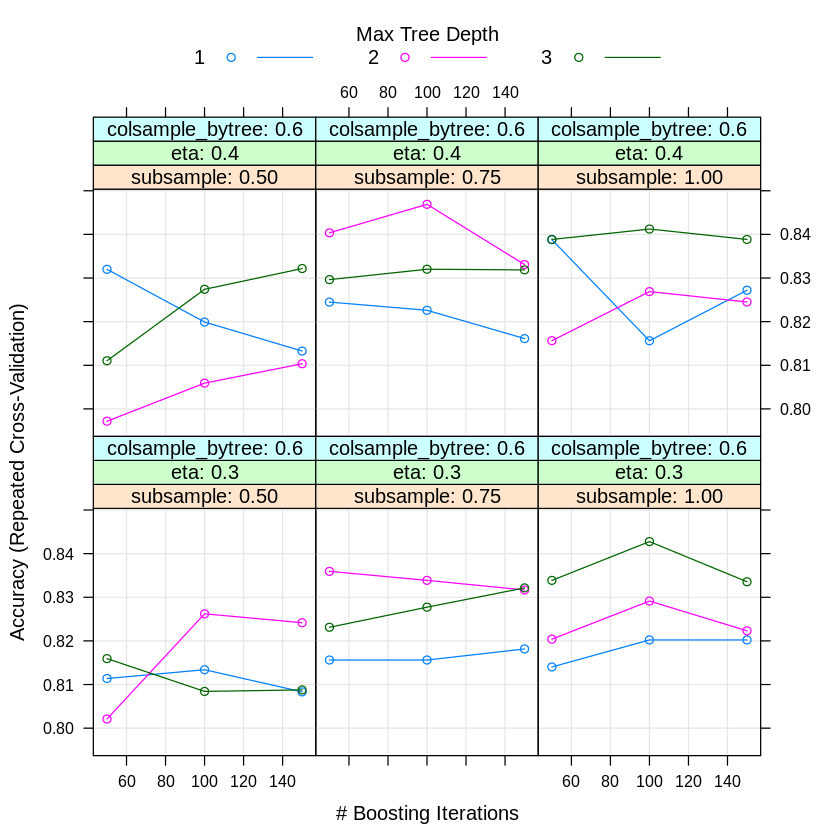

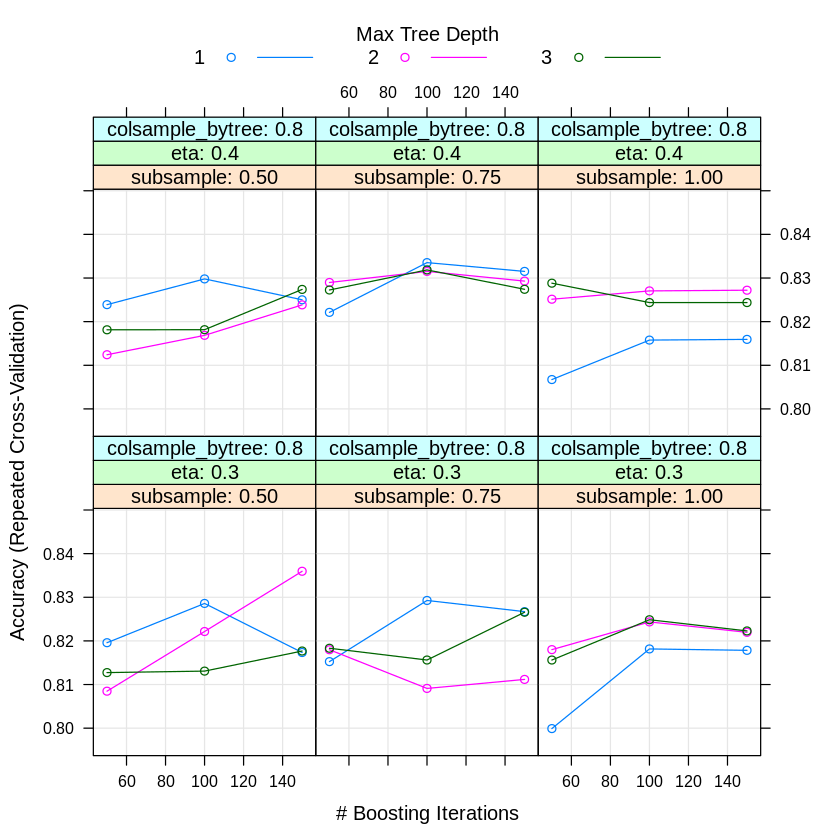

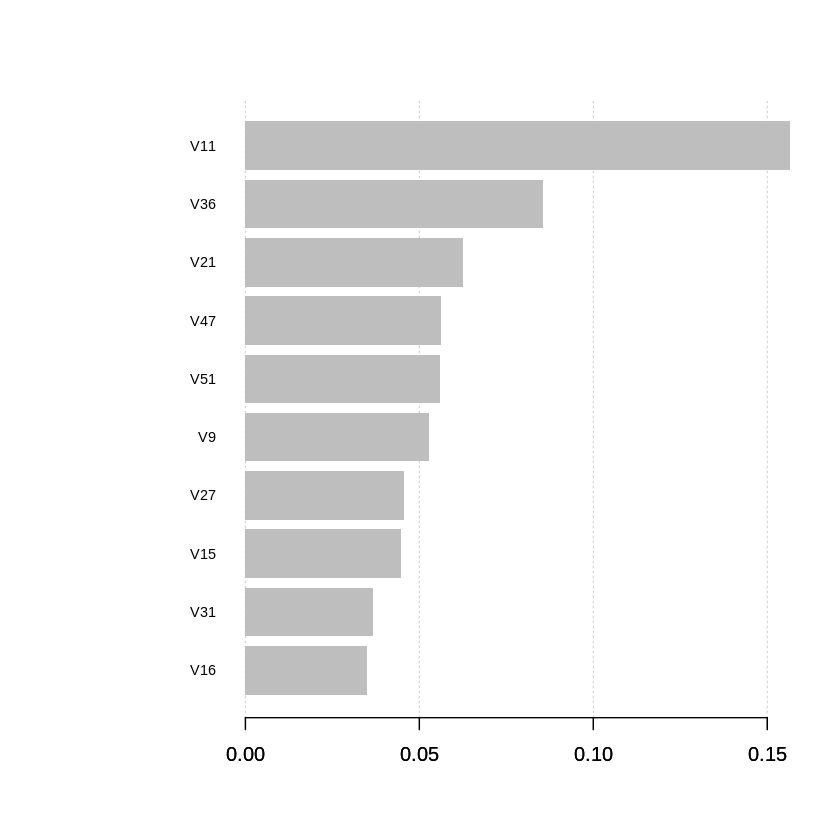

In [22]:
set.seed(123456)
xgb_default <- train(Class~., 
                     data = df_train, 
                     method="xgbTree", 
                     trControl = control)
xgb_default
xgb_default$finalModel
plot(xgb_default)

importance_matrix <- xgb.importance(names(df)[1:60], model = xgb_default$finalModel)
xgb.plot.importance(importance_matrix[1:10,])

In [24]:
confusionMatrix(predict(xgb_default, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 29  5
         R  4 24
                                          
               Accuracy : 0.8548          
                 95% CI : (0.7422, 0.9314)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 8.133e-08       
                                          
                  Kappa : 0.7079          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8788          
            Specificity : 0.8276          
         Pos Pred Value : 0.8529          
         Neg Pred Value : 0.8571          
             Prevalence : 0.5323          
         Detection Rate : 0.4677          
   Detection Prevalence : 0.5484          
      Balanced Accuracy : 0.8532          
                                          
       'Positive' Class : M               
                                    

Again, we can adjust the grid of hyperparameter values

eXtreme Gradient Boosting 

146 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 131, 131, 132, 131, 132, 131, ... 
Resampling results across tuning parameters:

  eta   max_depth  nrounds  Accuracy   Kappa    
  0.01  1           50      0.6990598  0.3863798
  0.01  1          100      0.7021001  0.3943035
  0.01  1          150      0.7176313  0.4285146
  0.01  1          200      0.7335043  0.4604026
  0.01  2           50      0.6996703  0.3914884
  0.01  2          100      0.7362027  0.4651329
  0.01  2          150      0.7522589  0.4980827
  0.01  2          200      0.7773382  0.5505516
  0.05  1           50      0.7422344  0.4780261
  0.05  1          100      0.7857509  0.5672619
  0.05  1          150      0.7903541  0.5788240
  0.05  1          200      0.7929182  0.5841821
  0.05  2           50      0.7792430  0.5539874
  0.05  2          100      0.8114896  0.6203440
  0.05

##### xgb.Booster
raw: 60.3 Kb 
call:
  xgboost::xgb.train(params = list(eta = param$eta, max_depth = param$max_depth, 
    gamma = param$gamma, colsample_bytree = param$colsample_bytree, 
    min_child_weight = param$min_child_weight, subsample = param$subsample), 
    data = x, nrounds = param$nrounds, objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.1", max_depth = "2", gamma = "0", colsample_bytree = "1", min_child_weight = "1", subsample = "1", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 60 
niter: 150
nfeatures : 60 
xNames : V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
problemType : Classification 
tuneValue :
	   nrounds max_depth eta gamma colsample_bytree 

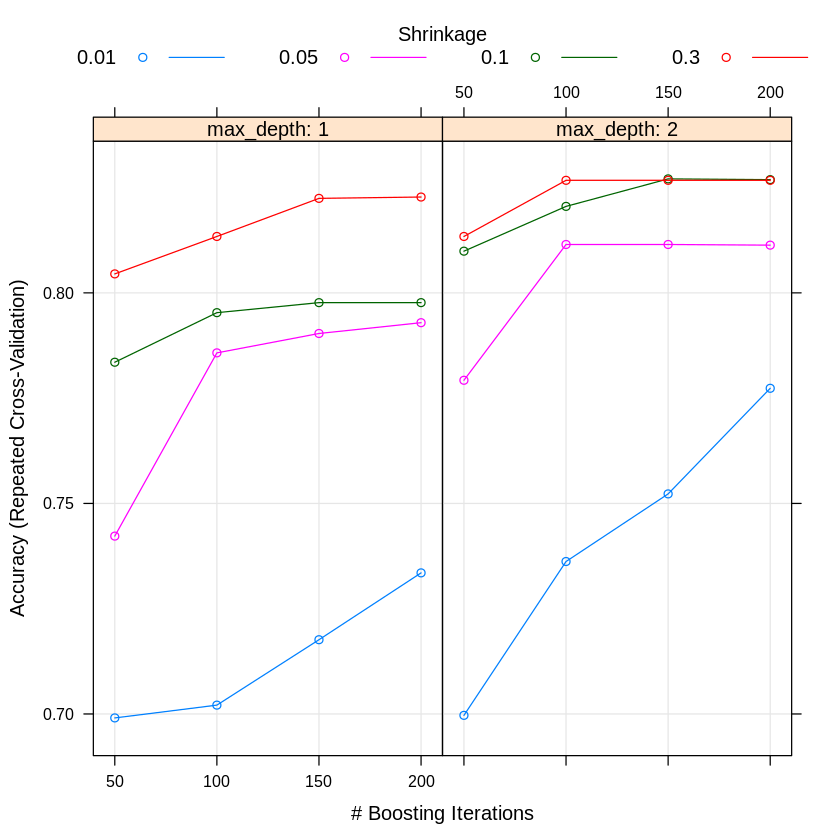

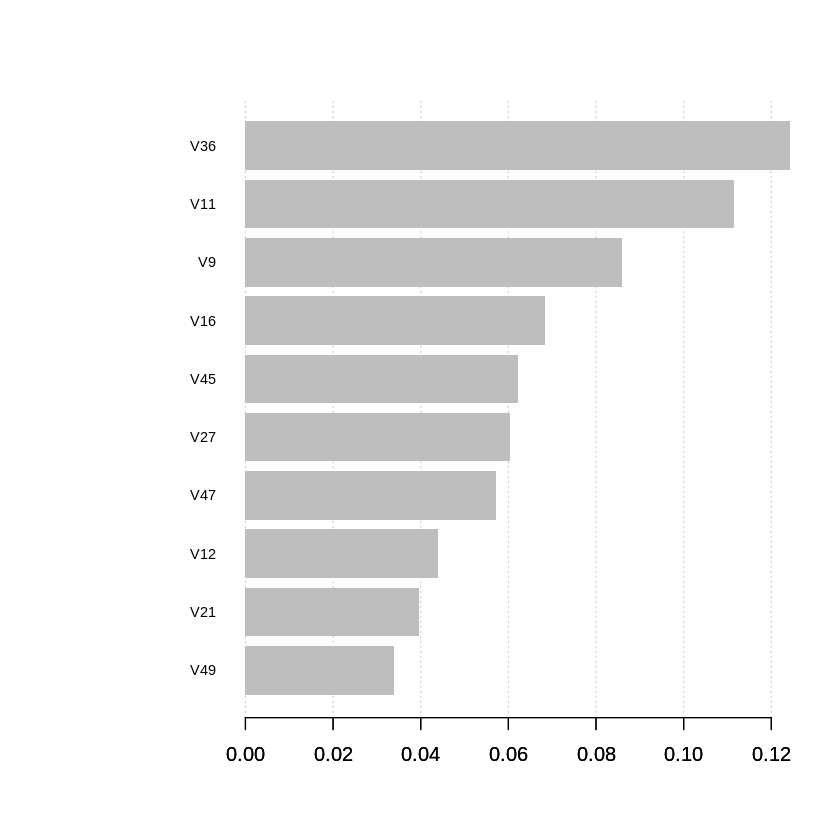

In [25]:
tune.gridxgb <- expand.grid(eta = c(0.01, 0.05, 0.1, 0.3),
                            nrounds = c(50, 100, 150, 200),
                            max_depth = 1:2,
                            gamma = 0,
                            subsample = 1,
                            min_child_weight = 1,
                            colsample_bytree = 1)

set.seed(123456)
xgb_tuned <- train(Class~., 
                   data = df_train, 
                   method="xgbTree", 
                   tuneGrid = tune.gridxgb, 
                   trControl = control)
xgb_tuned
xgb_tuned$finalModel
plot(xgb_tuned)

importance_matrix <- xgb.importance(names(df[1:60]), model = xgb_tuned$finalModel)
xgb.plot.importance(importance_matrix[1:10,])


In [26]:
confusionMatrix(predict(xgb_tuned, df_test), df_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 27  4
         R  6 25
                                          
               Accuracy : 0.8387          
                 95% CI : (0.7233, 0.9198)
    No Information Rate : 0.5323          
    P-Value [Acc > NIR] : 3.903e-07       
                                          
                  Kappa : 0.6774          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.8182          
            Specificity : 0.8621          
         Pos Pred Value : 0.8710          
         Neg Pred Value : 0.8065          
             Prevalence : 0.5323          
         Detection Rate : 0.4355          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.8401          
                                          
       'Positive' Class : M               
                                    

# To conclude

You could speed up the process of trying out different models on your own data by making use of this example code.